In [50]:
import matplotlib.pyplot as plt
import numpy as np

import torchtext.legacy.data as data

from collections import Counter


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
train_file = '/content/gdrive/My Drive/IntroToDeep/Project/codes/data/train.txt' 
test_file = '/content/gdrive/My Drive/IntroToDeep/Project/codes/data/test.txt'

In [41]:
def tokenize_joke(joke):
  temp = (joke).split(",")[1:] #drop the lable
  temp_str = ''.join(temp) 
  return temp_str.split()

In [44]:
text_field = data.Field(
    sequential=True,
    tokenize=tokenize_joke,
    include_lengths=True,
    batch_first=True,
    use_vocab=True)

train_data = data.TabularDataset(
    path=train_file,
    format="tsv",
    fields=[('joke', text_field)]
)

In [45]:
print(train_data[5].joke)
for example in train_data:
    print(example.joke)
    break

['martha', 'stewart', 'tweets', 'hideous', 'food', 'photo', 'twitter', 'responds', 'accordingly']
['joe', 'biden', 'rules', 'out', '2020', 'bid', ':', "'", 'guys', 'i', "'", 'm', 'not', 'running', "'"]


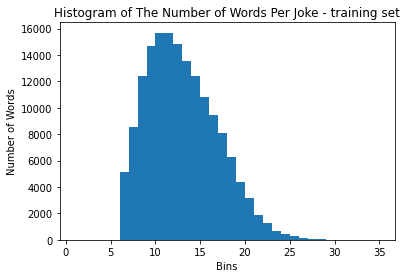

In [47]:
jokes_len_arr = [len(j.joke) - 2 for j in train_data]
plt.hist(jokes_len_arr, bins = range(min(jokes_len_arr),max(jokes_len_arr)))
plt.title("Histogram of The Number of Words Per Joke - training set")
plt.xlabel("Bins")
plt.ylabel("Number of Words")
plt.show()

In [49]:
words = np.concatenate([np.array(j) for j in train_data.joke])
unique = set(words)
print("The number of distinct words that appear in the training data is: {}".format(len(unique)))

The number of distinct words that appear in the training data is: 57190


In [51]:
num_of_words = Counter(words)

words_counter = np.array(list(num_of_words.most_common()))

appear_once = 0
appear_twice = 0
for arr in words_counter:
  if(int(arr[1]) == 1):
    appear_once += 1
  elif(int(arr[1]) == 2):
    appear_twice += 1

print("The number of words in the headline that appear only once is: {}".format(appear_once))
print("The number of words in the headline that appear only twice is: {}".format(appear_twice))

The number of words in the headline that appear only once is: 25357
The number of words in the headline that appear only twice is: 7029
